<a href="https://colab.research.google.com/github/Miit-009/Decoding-Online-Shopping-Behavior-Insights-from-Data-Driven-Analysis/blob/main/Decoding_Online_Shopping_Behavior_Insights_from_Data_Driven_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-c816a665b9d1>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


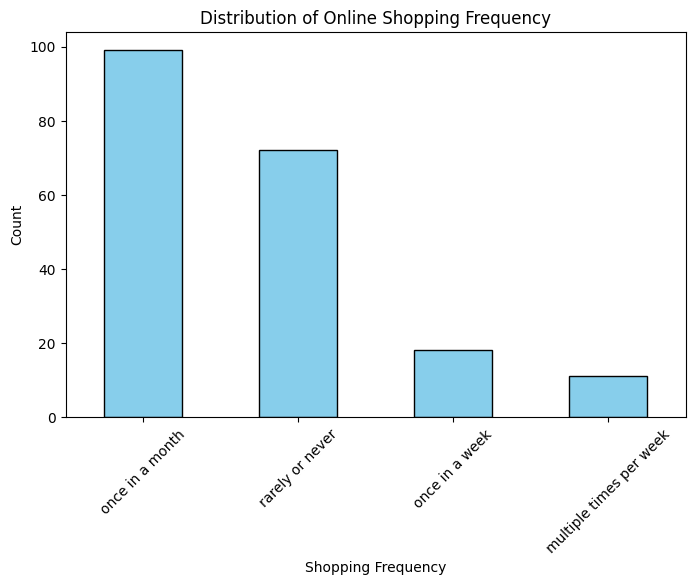

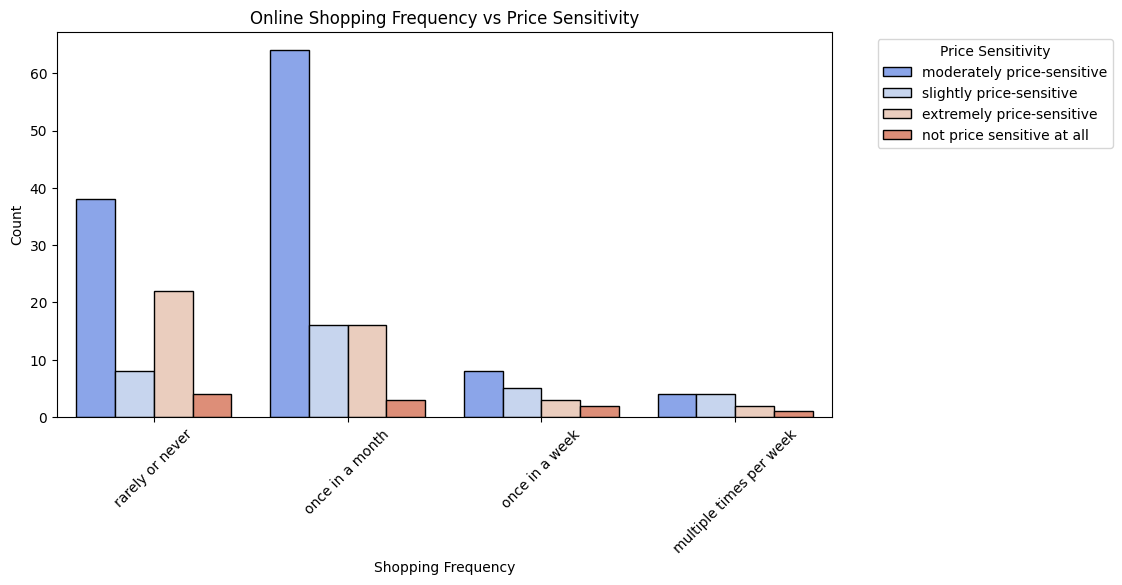

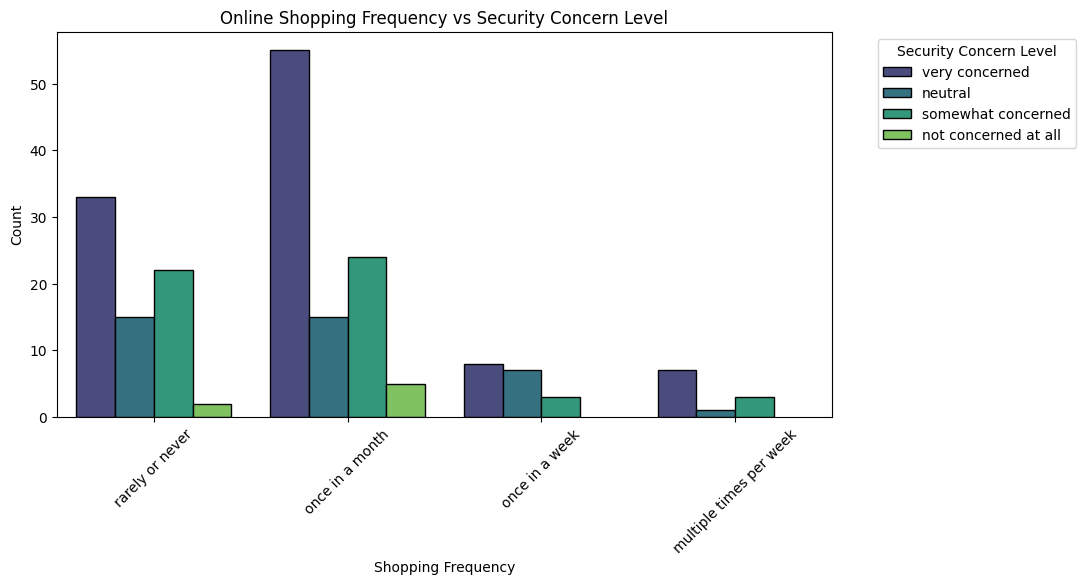


Chi-Square Test: Online Shopping Frequency vs Price Sensitivity
Price_Sensitivity        extremely price-sensitive  \
Online_Shopping_Freq                                 
multiple times per week                          2   
once in a month                                 16   
once in a week                                   3   
rarely or never                                 22   

Price_Sensitivity        moderately price-sensitive  \
Online_Shopping_Freq                                  
multiple times per week                           4   
once in a month                                  64   
once in a week                                    8   
rarely or never                                  38   

Price_Sensitivity        not price sensitive at all  slightly price-sensitive  
Online_Shopping_Freq                                                           
multiple times per week                           1                         4  
once in a month                        

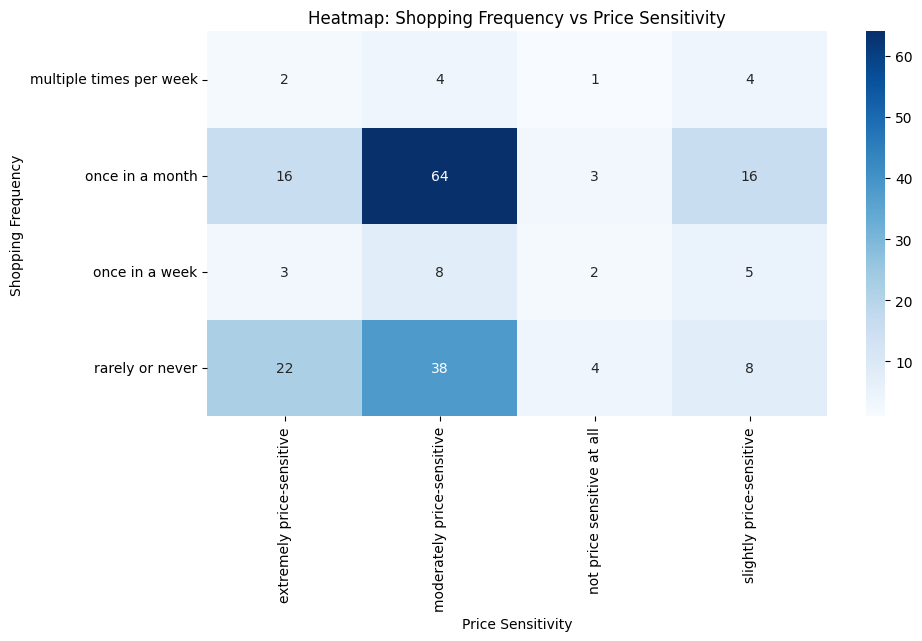


Chi-Square Test: Online Shopping Frequency vs Security Concern Level
Security_Concern_Level   neutral  not concerned at all  somewhat concerned  \
Online_Shopping_Freq                                                         
multiple times per week        1                     0                   3   
once in a month               15                     5                  24   
once in a week                 7                     0                   3   
rarely or never               15                     2                  22   

Security_Concern_Level   very concerned  
Online_Shopping_Freq                     
multiple times per week               7  
once in a month                      55  
once in a week                        8  
rarely or never                      33  
Chi-Square Value: 9.573309362527553, P-Value: 0.3861184330578429


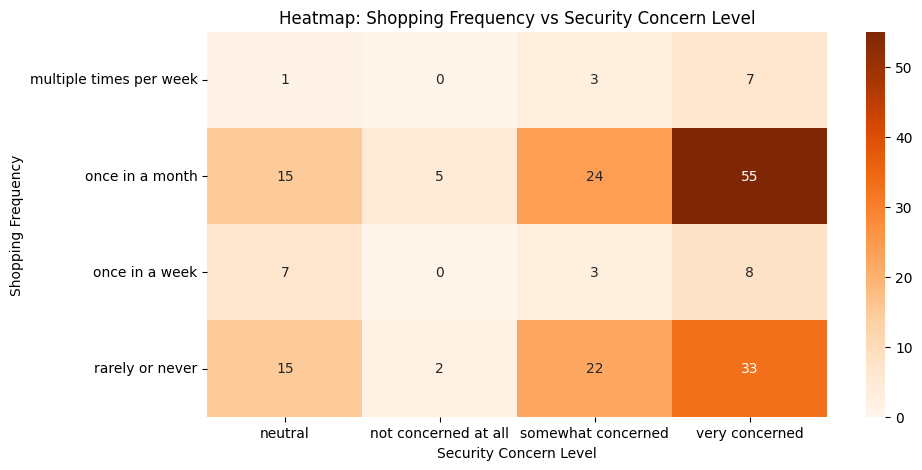


Decision Tree Model Performance
Model Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.57      0.60      0.59        20
           2       0.17      0.25      0.20         4
           3       0.73      0.57      0.64        14

    accuracy                           0.55        40
   macro avg       0.49      0.48      0.48        40
weighted avg       0.58      0.55      0.56        40



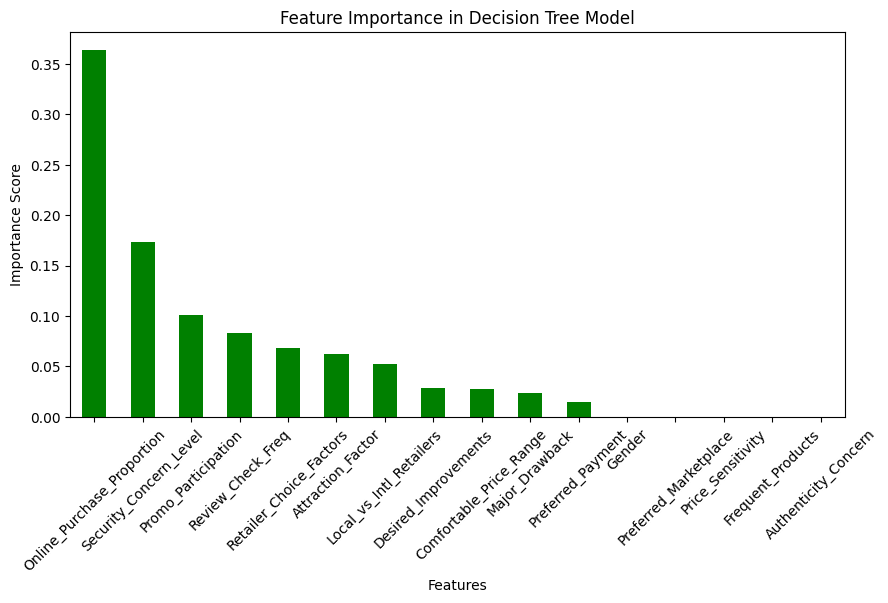

In [2]:
# Google Colab Code for Online Shopping Behavior Analysis

## Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import chi2_contingency

## Step 2: Load the Dataset
df = pd.read_csv("Online Shopping Data.csv")

## Step 3: Data Cleaning & Preparation
### Cleaning Data
# Remove invalid timestamp values in 'Gender' and 'Online_Shopping_Freq'
df = df[~df['Gender'].str.contains(r'\d{1,2}/\d{1,2}/\d{4}', na=False)]
df = df[~df['Online_Shopping_Freq'].str.contains(r'\d{1,2}/\d{1,2}/\d{4}', na=False)]

# Convert text to lowercase & strip spaces
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Standardize categorical values
df = df.replace({
    'Comfortable_Price_Range': {'less than 1k': '<1k', '1k to 5k': '1k-5k', '5k to 10k': '5k-10k', 'more than 10k': '>10k'},
    'Local_vs_Intl_Retailers': {'prefer lnternational retailers': 'prefer international retailers'},
    'Major_Drawback': {'shoes': 'other', 'beats ke headphone ki jagha "the bluetooth device is ready to pair" walay headphone de diya': 'other'}
})

## Step 4: Exploratory Data Analysis (EDA)
### Distribution of Online Shopping Frequency
plt.figure(figsize=(8, 5))
df['Online_Shopping_Freq'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Online Shopping Frequency')
plt.xlabel('Shopping Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Online Shopping Frequency vs Price Sensitivity
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Online_Shopping_Freq', hue='Price_Sensitivity', palette='coolwarm', edgecolor='black')
plt.title('Online Shopping Frequency vs Price Sensitivity')
plt.xlabel('Shopping Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Price Sensitivity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Online Shopping Frequency vs Security Concern Level
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Online_Shopping_Freq', hue='Security_Concern_Level', palette='viridis', edgecolor='black')
plt.title('Online Shopping Frequency vs Security Concern Level')
plt.xlabel('Shopping Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Security Concern Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Step 5: Statistical Analysis
### Chi-Square Test for Online Shopping Frequency vs Price Sensitivity
price_sensitivity_crosstab = pd.crosstab(df['Online_Shopping_Freq'], df['Price_Sensitivity'])
chi2_price, p_price, _, _ = chi2_contingency(price_sensitivity_crosstab)
print("\nChi-Square Test: Online Shopping Frequency vs Price Sensitivity")
print(price_sensitivity_crosstab)
print(f"Chi-Square Value: {chi2_price}, P-Value: {p_price}")

# Visualization
plt.figure(figsize=(10, 5))
sns.heatmap(price_sensitivity_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap: Shopping Frequency vs Price Sensitivity')
plt.xlabel('Price Sensitivity')
plt.ylabel('Shopping Frequency')
plt.show()

### Chi-Square Test for Online Shopping Frequency vs Security Concern Level
security_crosstab = pd.crosstab(df['Online_Shopping_Freq'], df['Security_Concern_Level'])
chi2_security, p_security, _, _ = chi2_contingency(security_crosstab)
print("\nChi-Square Test: Online Shopping Frequency vs Security Concern Level")
print(security_crosstab)
print(f"Chi-Square Value: {chi2_security}, P-Value: {p_security}")

# Visualization
plt.figure(figsize=(10, 5))
sns.heatmap(security_crosstab, annot=True, fmt='d', cmap='Oranges')
plt.title('Heatmap: Shopping Frequency vs Security Concern Level')
plt.xlabel('Security Concern Level')
plt.ylabel('Shopping Frequency')
plt.show()

## Step 6: Predictive Modeling using Decision Tree
### Encoding categorical variables
label_encoders = {}
for col in df.columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

### Define target variable and features
X = df.drop(columns=['Online_Shopping_Freq'])
y = df['Online_Shopping_Freq']

### Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Train Decision Tree Model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

### Make predictions
y_pred = model.predict(X_test)

### Evaluate Model Performance
print("\nDecision Tree Model Performance")
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualization of Feature Importance
plt.figure(figsize=(10, 5))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Feature Importance in Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()
